Pадача заключается в интерпретации алгоритма жадного отбора признаков для получения наилучшего качества модели - определение функции <b>select_greedy_mse</b>
Функционал качества в данном случае является <b>MSE</b>, а моделью - <b>линейная регрессия</b>.

Для начала импортируем необходимые библиотеки pandas, numpy

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Сгенерируем объекты и поместим их в датафрейм

In [37]:
data = np.array([[-1, 0,  98, 0.2, 10], [-2, 0.2, 70, 3, 12], [10.77, 0, 0.3, 11, 0.8], [4, 0, -0.2, 100, -1.2]])
test = pd.DataFrame(data, columns=['col0', 'col1', 'col2', 'col3', 'target'])

Считали из файла 4 сгенерированных объектов с 4 признаками в каждом, target - целевая метрика

In [38]:
test

,col0,col1,col2,col3,target
0,-1.00,0.0,98.0,0.2,10.0
1,-2.00,0.2,70.0,3.0,12.0
2,10.77,0.0,0.3,11.0,0.8
3,4.00,0.0,-0.2,100.0,-1.2


Определим класс LinearRegression для линейной регрессии. В методе <b>fit</b> происходит приём матрицы данных, вектора метрики для последующего подбора коэффициентов линейной регрессии. В методе <b>predict</b> происходит вычисление предсказанных значений. Метод <b>score</b> позволяет оценить качество предсказанных значений на основе идеальных с помощью среднеквадратичной ошибки.

In [39]:
class LinearRegression:
    def __init__(self):
        self.coef = None
        
    # calculating vector of weights
    def fit(self, x, y):
        x = np.append(np.ones((len(x), 1), dtype='int64'), x, axis=1)
        x_t = x.T
        self.coef = np.linalg.inv((x_t.dot(x))).dot(x_t).dot(y)
    
    # apply model to data
    def predict(self, x):
        return np.append(np.ones((len(x), 1), dtype='int64'), x, axis=1).dot(self.coef)
    
    # calculate score of model
    def score(self, y_true, y_pred):
        return (1 / len(y_true)) * np.sum(np.square(y_true-y_pred))

Определим функцию <b>select_greedy_mse</b>, принимающую на вход dataframe. Алгоритм жадного отбора признаков в данном случае реализуется путём выбора признака, который добавляется в набор признаков, от которого строится регрессия. Вычисляется функционал качества <b>MSE</b>, происходит сравнение с предыдущим его значением. Если качество стало лучше, то признак остается в наборе, иначе - исключается из набора признаков. Цикл проходит по всем признакам, пока все доступные не были протестированы.

In [40]:
def select_greedy_mse(df):
    # define model, mse, array to store the score
    model, MSE, mse_col = LinearRegression(), None, []
    
    # extract target/ideal values 
    target = df['target']
    
    # delete them from original data
    df.drop(['target'], inplace=True, axis=1)
    
    # processing the algorithm
    tmp = pd.DataFrame(data={}, columns=[])

    for el in df.columns:
        
        # add 1 new column
        tmp = pd.concat([tmp, df[el]], axis=1)
        
        # convert to numpy array
        data_tmp = tmp[tmp.columns].to_numpy()
        
        # calculating
        model.fit(data_tmp, target)
        
        # getting score
        tmp_mse = model.score(target, model.predict(data_tmp))
        
        mse_col.append(tmp_mse)
        
        if MSE != None and MSE <= tmp_mse:
            tmp.drop(el, axis=1, inplace=True)
        else:
             MSE = tmp_mse
                
    return (list(tmp.columns), mse_col)

Получим лист признаков и лист значений MSE, далее построим зависимость MSE от пройденных шагов.

In [41]:
data1, data2 = select_greedy_mse(test)

In [42]:
data1

['col0', 'col1', 'col2']

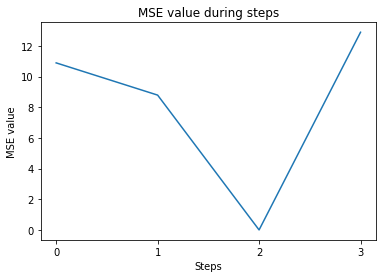

In [43]:
# plotting the graph 
plt.plot(data2)
plt.xticks(np.arange(0, test.columns.shape[0], step=1))
plt.title('MSE value during steps')
plt.xlabel('Steps')
plt.ylabel('MSE value')
plt.show()